# Distributions in Machine Learning

- Uniform
- Normal (Gaussian)
- Log-Normal
- Exponential & Laplace
- Binomial & Multinomial
- Poisson
- Mixture Distribution

#### Uniform Distribution

In [4]:
import numpy as np
import seaborn as sns

In [5]:
u = np.random.uniform(size=10000)

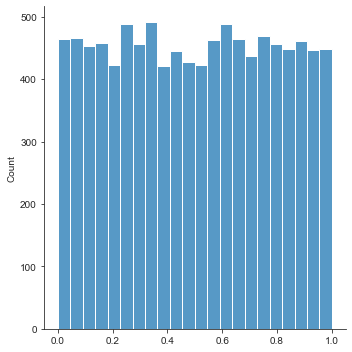

In [6]:
sns.set_style('ticks')
_ = sns.displot(u)

#### Real-world examples include:
- Dice rolling (PMF)
- Card drawing (PMF)
- Model hyperparameters
- Emission of radioactive particles
- Economic demand
- Analog-to-digital signal quantization errors

<hr>

#### Gaussian Distribution

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or <strong>normal distribution</strong>:

In [7]:
x = np.random.normal(size=10000)

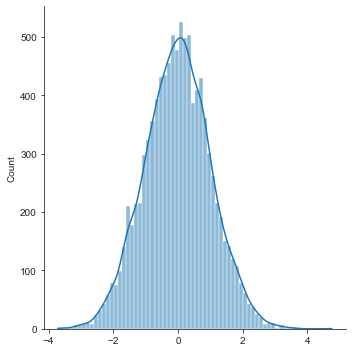

In [9]:
_ = sns.displot(x, kde=True) # kde = kernel density estimate

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with NumPy normal() method...

In [10]:
# increase #samples will make the mean closer to 0
np.mean(x)

-0.010639249916068615

In [11]:
np.std(x)

1.0155010722826505

...it is a <strong>standard normal distribution</strong> (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math callography* font as $\mathscr{N}(\mu,\sigma^2)$, thus the standard normal distribution can be denoted as $\mathscr{N}(0,1)$.  
(N.B.:$\sigma^2=\sigma$ in this case because $1^2=1$)

#### Real-world examples include:
- Probability of heads across $n$ tosses (PMF; $n=5$ earlier,$n=100$ below)
- Sum of di(c)e rolls (PMF)
- Height of adult women
- Height of adult men
- Education test scores, e.g., SAT

In [13]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

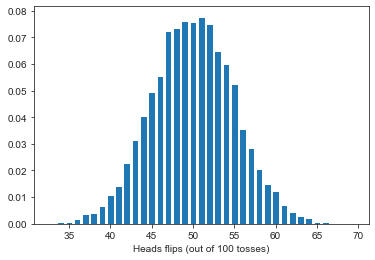

In [15]:
import matplotlib.pyplot as plt

plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

<hr>

#### The Central Limit Theorem
To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [16]:
x_sample = np.random.choice(x, size=10, replace=False) # no replacement = cannot sample the same data point twice
x_sample

array([ 0.81974006,  1.07220338,  1.99781847, -0.55102051, -0.52379505,
       -0.03444685, -0.25877082, -0.99358279,  0.32639292, -1.47496479])

In [17]:
# The mean of a sample isn't always going to be close to zero with such a small sample:
np.mean(x_sample)

0.037957400207626016

Let's define a function for generating <strong>sampling distributions</strong> of the mean of a given input distributions:

In [22]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

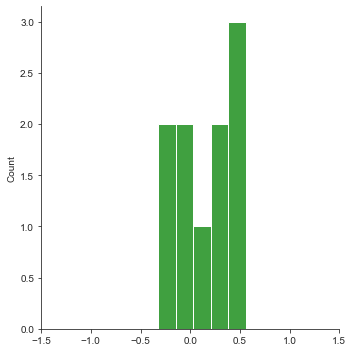

In [25]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

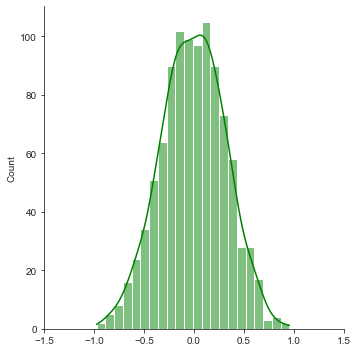

In [26]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the populatio mean:

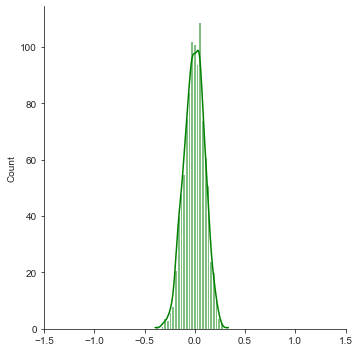

In [27]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

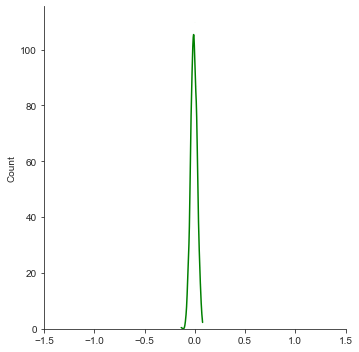

In [28]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Sampling from skewed distribution:

In [30]:
import scipy.stats as st

s = st.skewnorm.rvs(10, size=10000)

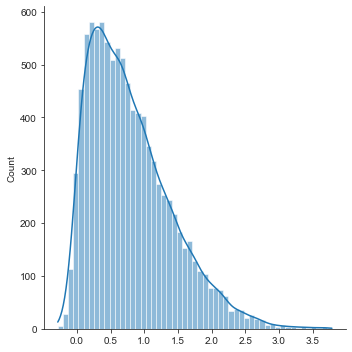

In [31]:
_ = sns.displot(s, kde=True)

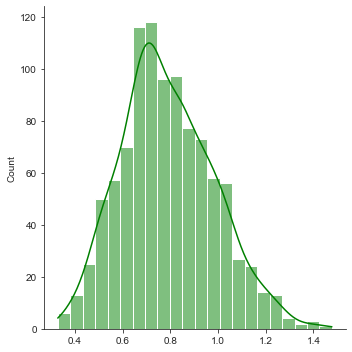

In [32]:
_ = sns.displot(sample_mean_calculator(s,10,1000), color='green', kde=True)

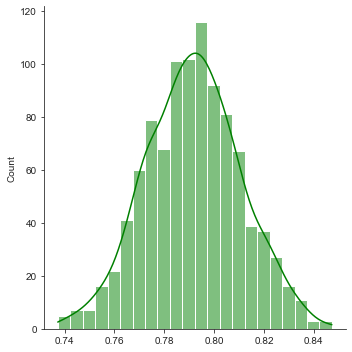

In [34]:
_ = sns.displot(sample_mean_calculator(s,1000,1000), color='green', kde=True)

Sampling from a multimodal distribution:

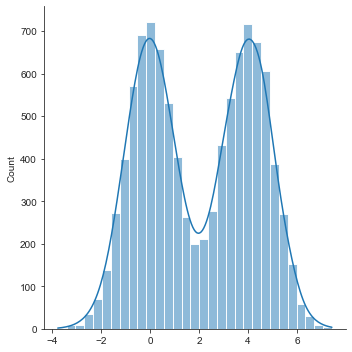

In [36]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc=4.0, size=5000)))

_ = sns.displot(m, kde=True)

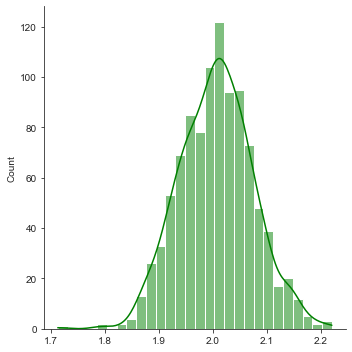

In [37]:
_ = sns.displot(sample_mean_calculator(m,1000,1000), color='green', kde=True)

Sampling from uniform:

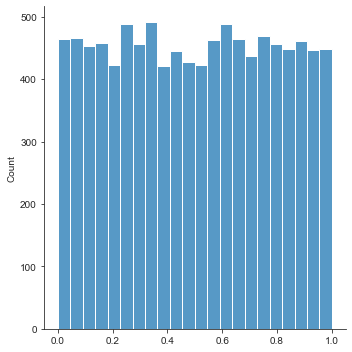

In [38]:
_ = sns.displot(u)

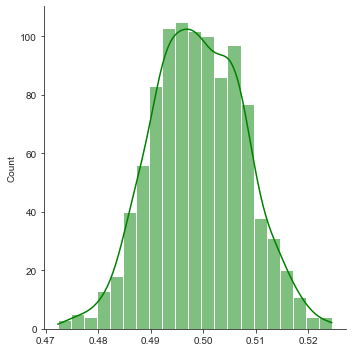

In [39]:
_ = sns.displot(sample_mean_calculator(u,1000,1000), color='green', kde=True)

<hr>

#### Log-Normal Distribution

The natural logarithm of the <strong>log-normal</strong> distribution is normally distributed:

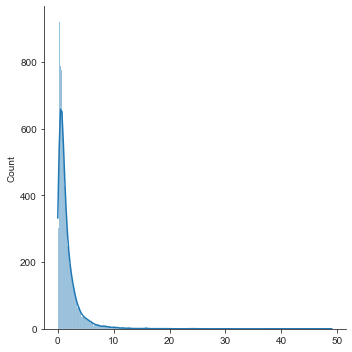

In [41]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1

_ = sns.displot(x, kde=True)

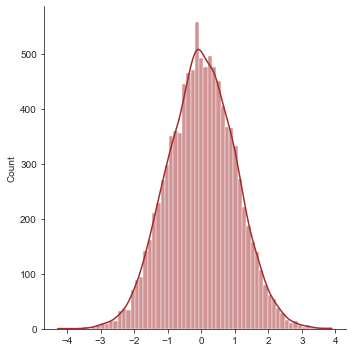

In [42]:
_ = sns.displot(np.log(x), color='brown', kde=True)

<hr>

#### Exponential Distribution

Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

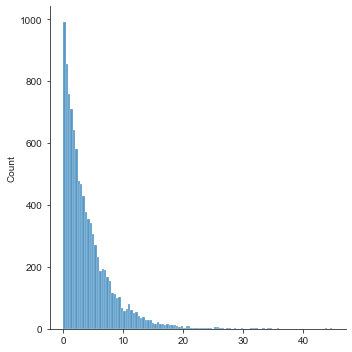

In [45]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

_ = sns.displot(x)

Its logarithm has a skewed distribution:

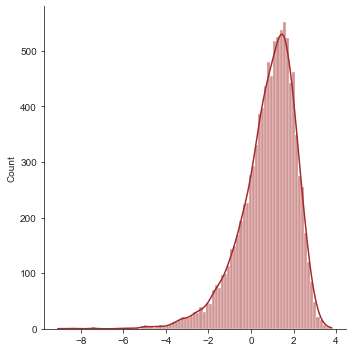

In [46]:
_ = sns.displot(np.log(x), color='brown', kde=True)

<hr>

#### Laplace Distribution

Named after Pierre-Simon Laplace, a key figure in the development of Bayesian statistics.

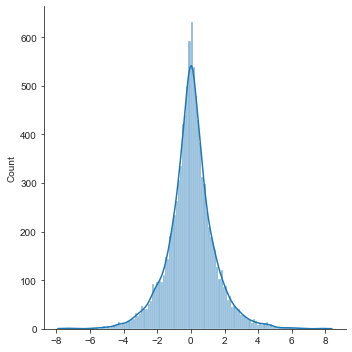

In [47]:
x = np.random.laplace(size=10000)

_ = sns.displot(x, kde=True) # alternatively referred to as the "double exponential distribution"

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value:

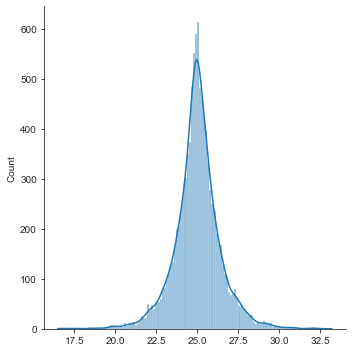

In [49]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

<hr>

#### Binomial Distribution

All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). \
We've already been using it for coin flips; its used for binary (0 or 1) outcome. \
Its parameters are:
- $n$: number of trials
- $p$: probability of outcome of 1
- $size$: number of experiments with $n$ trials each

In [50]:
n = 5
n_experiments = 1000

##### Fair coin ($p=0.5$)

In [51]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

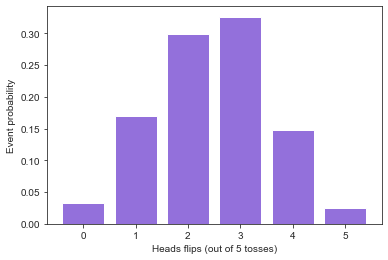

In [52]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

##### Weighted coin ($p=0.8$)

In [53]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

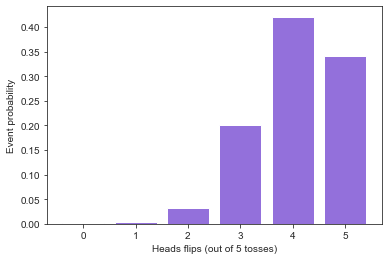

In [54]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial disributions are created by sampling $n>1$ "Bernoulli trials". The <strong>Bernoulli</strong> distribution is equivalent to the binomial distribution where $n=1$:

Real-world examples:
- Making it to work on time
- Candidate being invited to interview
- Epidemiology: probability of death or catching disease

In [58]:
np.random.binomial(1, 0.5)

0

<hr>

#### Multinomial Distribution

Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die:

In [60]:
n = 1000

rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([161, 133, 177, 173, 181, 175])

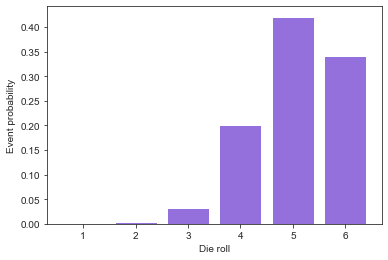

In [61]:
plt.bar(range(1,7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sample $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$:

In [64]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 1, 0])

<hr>

#### Poisson Distribution

It's named after Frech mathematician Simeon Denis Poisson and is used for count data, e.g.:
- Number of cars that drive by in a minute
- Number of guests at restaurant in an evening
- Number of new hires in a month

First argument to NumPy poisson() method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [67]:
lam=5

Second argument is number of samples to draw:

In [65]:
n=1000

In [68]:
samples = np.random.poisson(lam, n)

samples[0:20]

array([ 3,  6,  3, 10,  2,  4,  5,  8,  6,  4,  4,  6,  9,  3,  4,  3,  6,
        4,  4,  7])

In [69]:
x, x_count = np.unique(samples, return_counts=True)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14])

In [70]:
x_count

array([  5,  40,  80, 132, 176, 172, 147, 103,  69,  35,  20,  14,   6,
         1], dtype=int64)

In [71]:
Px = x_count/n

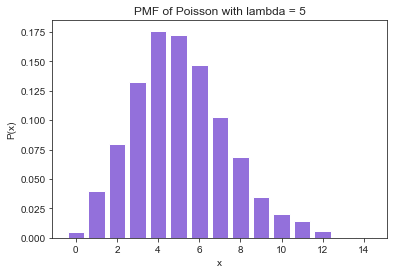

In [72]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

<hr>

#### Mixture Distributions

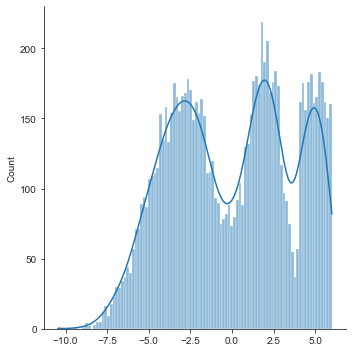

In [74]:
# adapted from Stack Overflow post
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3]) # relative proportion of each distribution
coefficients /= coefficients.sum()  # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)